In [1]:
ls

 Volume in drive C is WINDOWS
 Volume Serial Number is AE83-8D62

 Directory of C:\Users\RCole02.ROYALSURREY\Desktop\GitHub\Useful-python-for-medical-physics\Experiments in ipython notebooks\Project\Dose comparison with CC

21/10/2016  12:48    <DIR>          .
21/10/2016  12:48    <DIR>          ..
21/10/2016  09:44    <DIR>          .ipynb_checkpoints
21/10/2016  12:29             2,534 ALL_DATA_21_10_2016.csv
21/10/2016  12:06    <DIR>          archive
21/10/2016  12:48           463,636 Dose comparison 21 - 10 - 2016.ipynb
21/10/2016  09:25               937 Eclipse_data_19_10.csv
19/10/2016  09:40               139 EGS_data_19_10.csv
19/10/2016  14:18         1,528,065 Fig1.png
21/10/2016  12:11            72,116 Fig1_low.png
19/10/2016  09:39               111 PINNACLE_TRUEBEAM_CCC_data_19_10.csv
21/10/2016  12:08            37,567 Prettify df table 21-10.ipynb
21/10/2016  12:07            73,341 Table_21.PNG
               9 File(s)      2,178,446 bytes
               4 Dir(s)  

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks')

### Helper functions for cleaning data

In [3]:
def d1_id(df):    # helper function to get the index when Mass density = 1.0
    return df[df['Mass density']==1.0].index.tolist()[0]
#d1_id(EGS)

def n_r(df, raw_col = 'Raw_data_col', norm_col = 'Normalised_data_col'): # norm and return, pass the dataframe, column to normalise and drop, and the norm col name
    if raw_col in df.columns:
        df[norm_col] = df[raw_col]/df[raw_col].iloc[d1_id(df)]
        df = df.drop(raw_col, 1) 
        return df

# EGS = n_r(EGS, raw_col = 'EGS_Dose', norm_col = 'EGS_Dose_norm')

# Load and format data

In [4]:
CCC = pd.read_csv("PINNACLE_TRUEBEAM_CCC_data_19_10.csv")  # index_col=[0]
CCC = n_r(CCC, raw_col = 'CCC_Dose', norm_col = 'CCC')
#CCC

In [5]:
EGS = pd.read_csv("EGS_data_19_10.csv")  # index_col=[0]
EGS = n_r(EGS, raw_col = 'EGS_Dose', norm_col = 'EGS')
#EGS

### Combine cleaned CC & EGS data

In [6]:
CCC_EGS_data = pd.merge(CCC, EGS, how='inner', on=['Mass density'])
CCC_EGS_data

,Mass density,CCC,EGS
0,0.0,1.021097,0.966667
1,0.5,1.015471,1.020000
2,1.0,1.000000,1.000000
3,1.5,0.967651,0.973333
4,2.0,0.928270,0.946667
5,2.5,0.881857,0.920000
6,3.0,0.853727,0.900000
7,3.5,0.838256,0.873333
8,4.0,0.822785,0.853333


In [7]:
#fig, ax = plt.subplots()
#ax.scatter(x='Mass density', y='CCC_Dose_norm', data=CCC_EGS_data); #, c='k', alpha=.15  # Matplotlib plot

In [8]:
ECLIPSE = pd.read_csv("Eclipse_data_19_10.csv")  # index_col=[0]
ECLIPSE = n_r(ECLIPSE, raw_col = 'AAA (Gy) point', norm_col = 'AAA')
ECLIPSE = n_r(ECLIPSE, raw_col = 'AXB Dw (Gy) point', norm_col = 'AXB Dw')
ECLIPSE = n_r(ECLIPSE, raw_col = 'AXB Dm (Gy) point', norm_col = 'AXB Dm')
ECLIPSE

,VOI Material,CT number,Mass density,Elect density,Proton Stp PWR,AAA,AXB Dw,AXB Dm
0,Air,-993,0.00,0.0072,0.0073,1.033987,1.048493,0.908257
1,Lung,-734,0.26,0.2660,0.2699,1.013072,1.023591,1.022280
2,Adipose tissue,-105,0.92,0.8954,0.9421,1.005229,0.979030,0.998689
3,Water,0,1.00,1.0000,1.0100,1.000000,1.000000,1.000000
4,Epoxy,38,1.04,1.0384,1.0389,1.000000,1.019659,0.944954
5,Muscle skeletal,48,1.05,1.0480,1.0483,1.000000,1.002621,0.988204
6,Cartilage,128,1.10,1.1280,1.0855,0.994771,1.007864,0.982962
7,PMMA,282,1.19,1.2103,1.1617,0.994771,0.992136,0.960682
8,Radel,470,1.30,1.3209,1.2548,0.994771,1.022280,0.929227
9,PEEK,487,1.31,1.3309,1.2633,0.994771,1.003932,0.923984


In [9]:
df = pd.merge(CCC_EGS_data, ECLIPSE, how='outer', on='Mass density')   # merge 2 tables
df.sort('Mass density', inplace=True)                                  # sort on Mass density

C:\Users\RCole02.ROYALSURREY\AppData\Local\Continuum\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [10]:
metrics_ = [ 'AAA', 'AXB Dw', 'AXB Dm', 'CCC', 'EGS']
df['Mean'] = df.loc[:,metrics_].mean(axis=1)   # apply mean by row
df['Max'] = df.loc[:,metrics_].max(axis=1)   # apply mean by row
df['Min'] = df.loc[:,metrics_].min(axis=1)   # apply mean by row

df['Max % error'] = df.loc[:,'Max']   # apply mean by row

In [11]:
df['Max % error'] = 100.0*(df['Max'] - df['Min'])/df['Min']   # apply mean by row

In [12]:
df2 = df[['VOI Material', 'Mass density', 'CT number', 'AAA', 'AXB Dw', 'AXB Dm', 'CCC', 'EGS', 'Mean', 'Max % error']]   # rearrange, , 'Elect density', 'Proton Stp PWR', 'Min', 'Max',  
df2

,VOI Material,Mass density,CT number,AAA,AXB Dw,AXB Dm,CCC,EGS,Mean,Max % error
0,Air,0.00,-993.0,1.033987,1.048493,0.908257,1.021097,0.966667,0.995700,15.440115
9,Lung,0.26,-734.0,1.013072,1.023591,1.022280,NaN,NaN,1.019648,1.038346
1,NaN,0.50,NaN,NaN,NaN,NaN,1.015471,1.020000,1.017736,0.445983
10,Adipose tissue,0.92,-105.0,1.005229,0.979030,0.998689,NaN,NaN,0.994316,2.675976
2,Water,1.00,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
11,Epoxy,1.04,38.0,1.000000,1.019659,0.944954,NaN,NaN,0.988204,7.905687
12,Muscle skeletal,1.05,48.0,1.000000,1.002621,0.988204,NaN,NaN,0.996942,1.458886
13,Cartilage,1.10,128.0,0.994771,1.007864,0.982962,NaN,NaN,0.995199,2.533333
14,PMMA,1.19,282.0,0.994771,0.992136,0.960682,NaN,NaN,0.982530,3.548494
15,Radel,1.30,470.0,0.994771,1.022280,0.929227,NaN,NaN,0.982093,10.014104


In [13]:
df2.to_csv('ALL_DATA_21_10_2016.csv', index=False)  # write to file

# Plots using Matplotlib

http://matplotlib.org/users/text_intro.html  Intro

http://matplotlib.org/examples/index.html    Examples

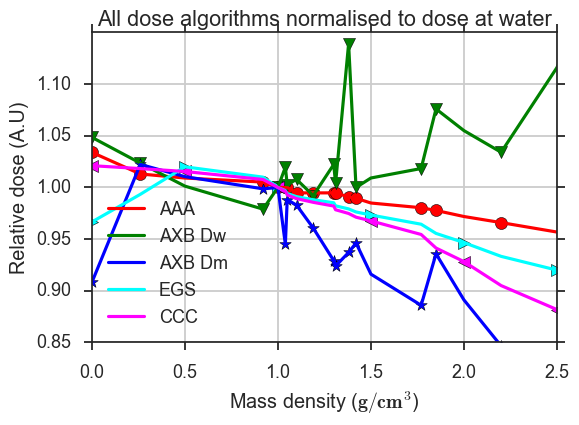

In [14]:
plt.figure(figsize=(6, 4))  # width, height

plots = ['AAA', 'AXB Dw', 'AXB Dm', 'EGS', 'CCC']
color = ['red', 'green',  'blue',   'cyan', 'magenta']
markers = ['o', 'v', '*', '>', '<']

md = 'Mass density'

for i, x in enumerate(plots):
    plt.plot(df['Mass density'], df[plots[i]].interpolate(), c=color[i]) #, c='k', alpha=.15  # Matplotlib plot, .interpolate() over NaN
    plt.scatter(df['Mass density'], df[plots[i]], c=color[i], marker=markers[i],s=75) #, c='k', alpha=.15  # Matplotlib plot
   

axes = plt.gca()
axes.set_xlim([0,2.5]) # min and max
axes.set_ylim([0.85,1.15])

plt.xlabel(r'Mass density ($\mathbf{g/cm^{3}}$)')
plt.ylabel('Relative dose (A.U)')
plt.title('All dose algorithms normalised to dose at water')

legend = plt.legend(plots, shadow=True, fontsize='small', loc='lower left') ,
plt.grid(True)
#plt.savefig('Fig1.png' , dpi=500);#, format='pdf'
plt.show();

# Pandas native plot

http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html

Comparison with sns http://stackoverflow.com/questions/37168303/seaborn-timeseries-plot-with-multiple-series

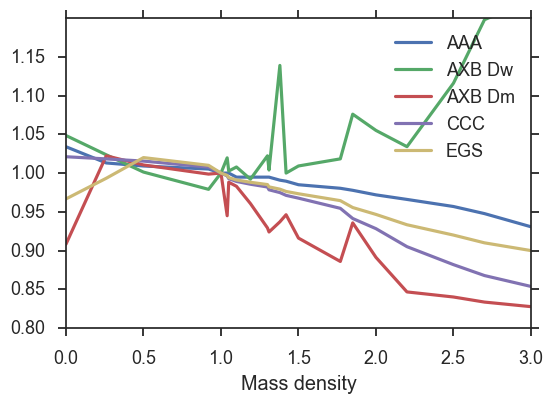

In [15]:
metrics_ = [ 'AAA', 'AXB Dw', 'AXB Dm', 'CCC', 'EGS']
df[metrics_].interpolate().plot(x=df['Mass density'], kind='line', figsize=(6, 4), xlim=(0.0, 3.0), ylim=(0.8, 1.2))

# Seaborn

In [22]:
metrics_ = [ 'AAA', 'AXB Dw', 'AXB Dm', 'CCC', 'EGS']
df_sns = pd.melt(df.interpolate(), id_vars=['Mass density'], value_vars=metrics_)  # put dataframe in tidy format
df_sns.head()

,Mass density,variable,value
0,0.00,AAA,1.033987
1,0.26,AAA,1.013072
2,0.50,AAA,1.009150
3,0.92,AAA,1.005229
4,1.00,AAA,1.000000


## Factor plot

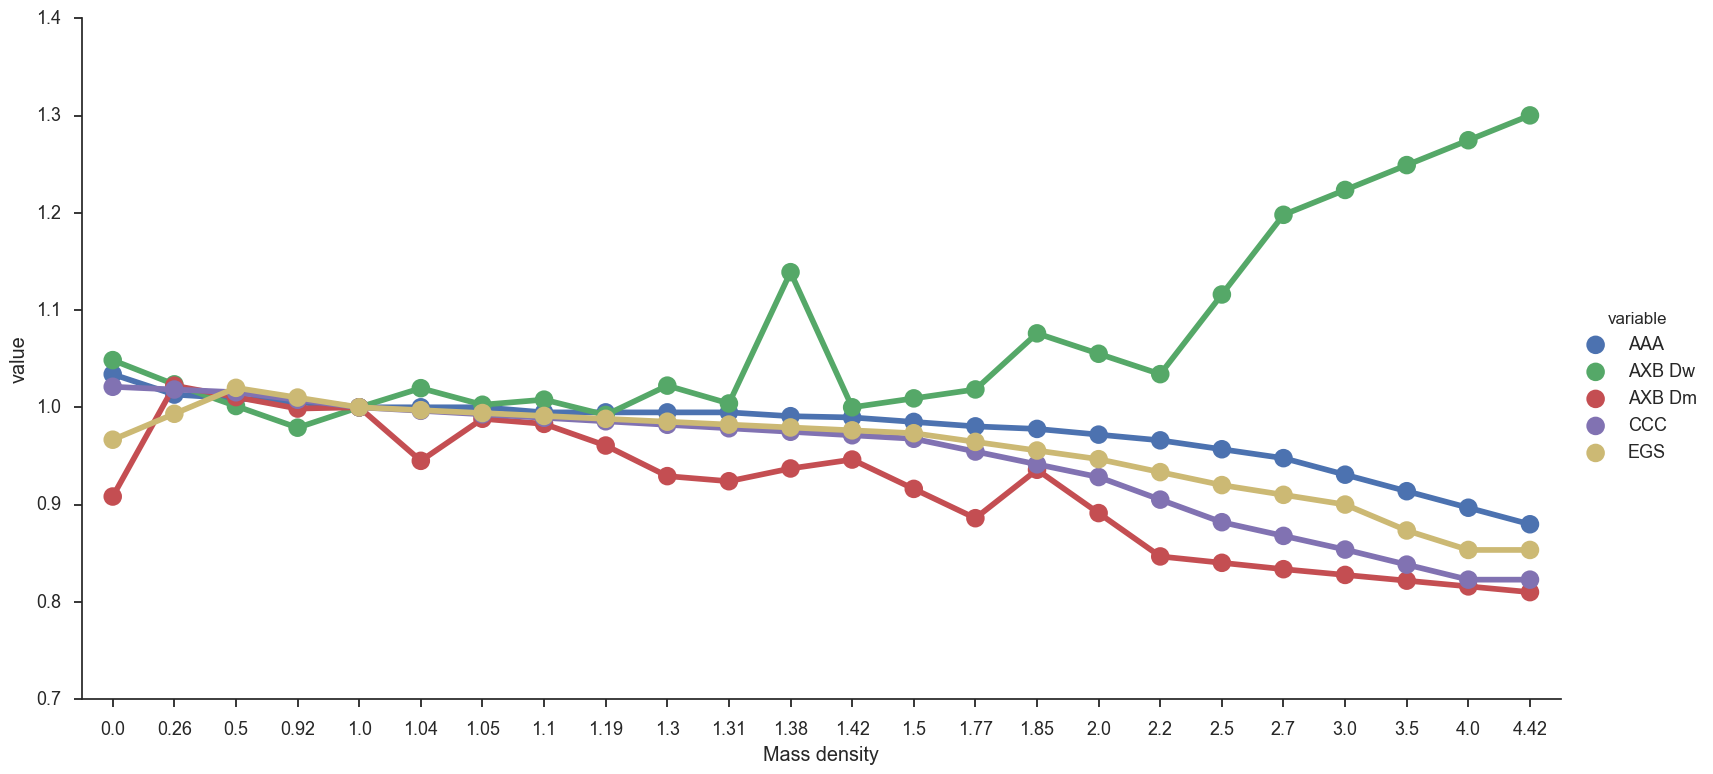

In [17]:
g = sns.factorplot(x="Mass density", y="value", hue="variable", data=df_sns, size=8, aspect=2)  # , kind="bar"

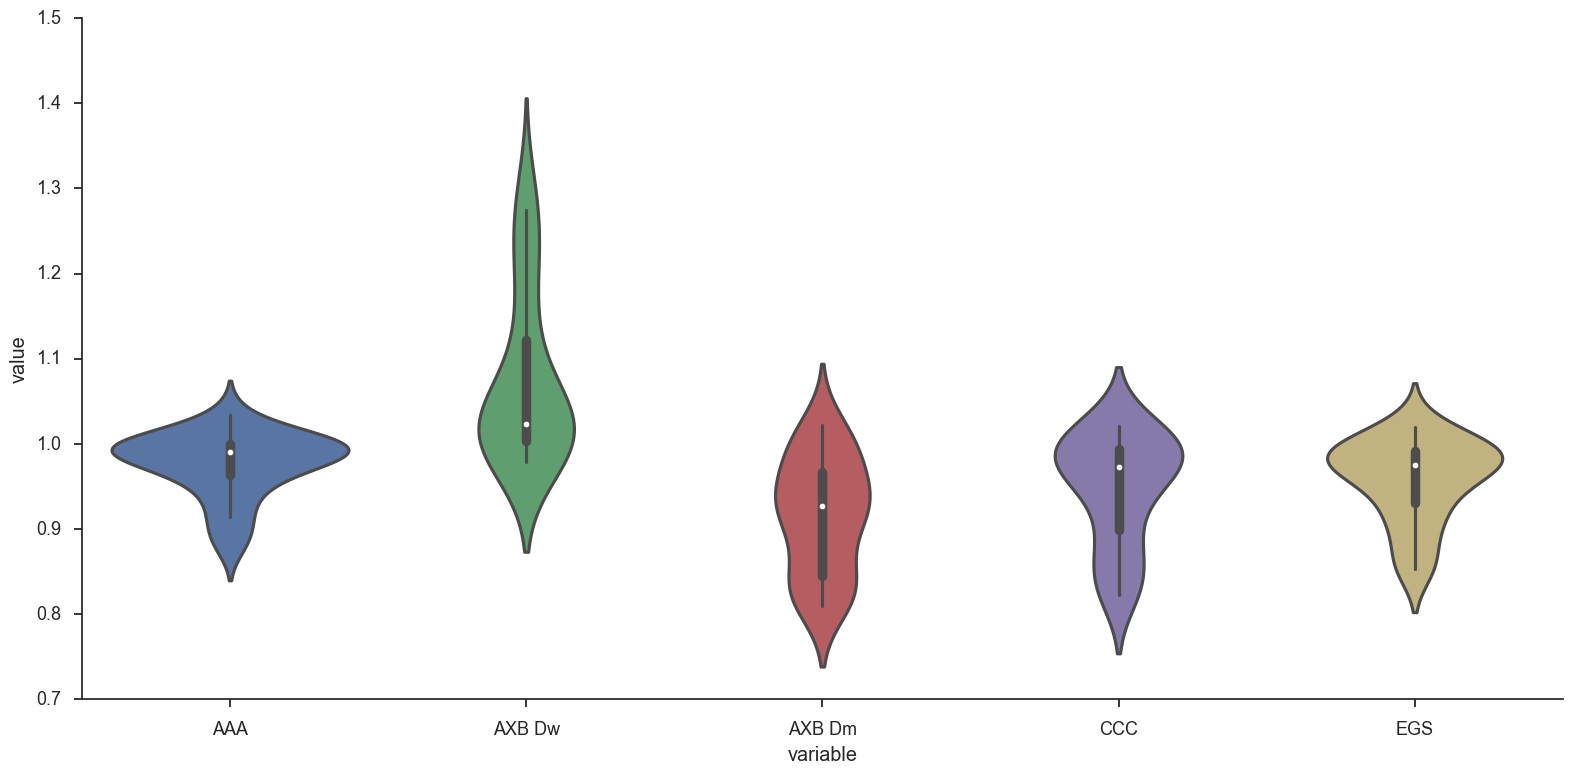

In [18]:
g = sns.factorplot(x="variable", y="value", data=df_sns, size=8, aspect=2, kind="violin")  # 

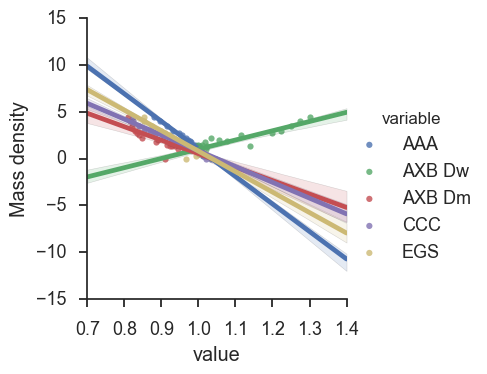

In [25]:
sns.lmplot( x="value", y="Mass density", hue="variable", data=df_sns, size=4, aspect=1);

## Correlation matrix plot

In [30]:
metrics_ = [ 'AXB Dw', 'AXB Dm'] # , 'AAA',  'CCC', 'EGS'
d = df[metrics_].interpolate()
corr = d.corr()

In [31]:
corr

,AXB Dw,AXB Dm
AXB Dw,1.000000,-0.803763
AXB Dm,-0.803763,1.000000


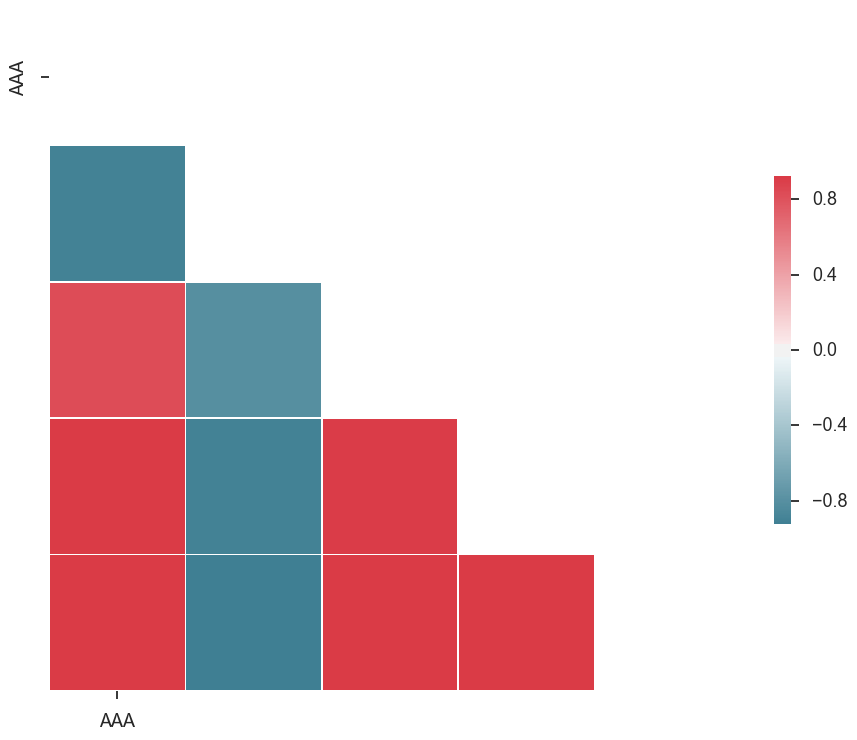

In [21]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=5, yticklabels=5,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)